<a href="https://colab.research.google.com/github/majidraeis/Accident-Risk-Prediction/blob/main/NewYork_collision_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install geopandas
!pip install geopy
!pip install mplleaflet

In [4]:
import pandas as pd
import numpy as np

In [5]:
cd /content/gdrive/MyDrive/VisionZero/nyc

/content/gdrive/MyDrive/VisionZero/nyc


# Data Cleaning

### Loading NYC Collision Dataset

In [6]:
df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv', parse_dates=[['CRASH DATE', 'CRASH TIME']])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.set_index('CRASH DATE_CRASH TIME', inplace=True)
df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE_CRASH TIME,,,,,,,,,,,,,,,,,,,,,
2021-04-14 05:32:00,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
2021-04-13 21:35:00,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2021-04-15 16:15:00,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2021-04-13 16:00:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
2021-04-12 08:25:00,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [10]:
df = df.loc['2015-01-01':'2015-12-31']
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
CRASH DATE_CRASH TIME,,,,,,,,,,,,,,,,,,,,,
2015-03-14 09:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,3186522,OTHER,OTHER,NaN,NaN,NaN
2015-05-15 18:35:00,BRONX,10465.0,40.829687,-73.825295,"(40.8296875, -73.8252953)",EAST TREMONT AVENUE,LAFAYETTE AVENUE,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,3222365,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2015-11-17 17:00:00,BROOKLYN,11234.0,40.630629,-73.926177,"(40.6306286, -73.926177)",AVENUE I,EAST 52 STREET,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,3336795,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2015-02-14 19:20:00,MANHATTAN,10011,40.737361,-73.996839,"(40.7373607, -73.996839)",AVENUE OF THE AMERICAS,WEST 14 STREET,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,3169119,PASSENGER VEHICLE,LIVERY VEHICLE,NaN,NaN,NaN
2015-09-08 03:11:00,QUEENS,11369.0,40.762658,-73.873251,"(40.762658, -73.8732511)",ASTORIA BOULEVARD,96 STREET,NaN,1.0,0.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,3292716,SPORT UTILITY / STATION WAGON,MOTORCYCLE,NaN,NaN,NaN


In [11]:
df.shape

(217694, 27)

In [12]:
df.reset_index(inplace=True)

### Dealing with Nan coordinates
There are many collision locations without coordinates. We find the coordinates of these locations using "Nominatim", which uses OpenStreetMap data to find locations on Earth by name and address

In [13]:
print(sum(df.LOCATION.isna()))
df_missing_loc = df[df.LOCATION.isna()]

34714


In [15]:
cols_to_keep = ['CRASH DATE_CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
df_missing_loc = df_missing_loc[cols_to_keep] 
df_missing_loc.head()

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,2015-04-28 14:47:00,NaN,NaN,NaN,NaN,0.0,0.0
1,2015-12-19 00:30:00,NaN,NaN,NaN,NaN,0.0,0.0
2,2015-12-31 16:00:00,NaN,NaN,NaN,NaN,0.0,0.0
3,2015-12-31 19:20:00,NaN,NaN,NaN,NaN,0.0,0.0
4,2015-12-30 00:55:00,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
from tqdm import tqdm
from geopy.geocoders import Nominatim
import time
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="my-application")

for i in tqdm(range(140,len(df_missing_loc))):
  try:
    loc = df_missing_loc['ON STREET NAME'][i] + 'New york'
    location = geolocator.geocode(loc)
  except Exception:
      pass
  
  if location:
    df_missing_loc.LOCATION[i] = (location.latitude, location.longitude)
df_missing_loc.head()

df_missing_loc.to_csv('df_missing_loc_2015.csv', index=False)

In [ ]:
df_missing_loc = pd.read_csv('df_missing_loc_2015.csv')

In [ ]:
import numpy as np
cols_to_keep = ['CRASH DATE_CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
missing_indices = np.arange(len(df))[df.LOCATION.isna()]
for i, ind in enumerate(missing_indices):
  df.LOCATION[ind] = df_missing_loc.LOCATION[i]

In [ ]:
 df.to_csv('crash_2015_loc_cleaned.csv', index=False)

### Read Cleaned Collision Dataset

In [25]:
df = pd.read_csv('crash_2015_loc_cleaned.csv', parse_dates=['CRASH DATE_CRASH TIME'])
df = df[df.LOCATION.notna()]
df = df[df['ON STREET NAME'].notna()]
df.reset_index(inplace=True)
df = df.drop('index', 'columns')
df.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
73994,2015-07-20 08:45:00,BROOKLYN,11213.0,40.666022,-73.929461,"(40.6660219, -73.9294613)",CARROLL STREET,FORD STREET,NaN,1.0,...,Unspecified,NaN,NaN,NaN,3261779.0,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
82434,2015-08-04 11:43:00,BROOKLYN,11210.0,40.632886,-73.947698,"(40.6328856, -73.9476978)",FLATBUSH AVENUE,HILLEL PLACE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3271078.0,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
115421,2015-05-08 12:00:00,QUEENS,11367.0,40.730771,-73.826182,"(40.7307711, -73.8261824)",140 STREET,69 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3225752.0,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
97487,2015-06-18 05:30:00,BROOKLYN,11208.0,40.666291,-73.872670,"(40.6662914, -73.87267)",LOGAN STREET,LINDEN BOULEVARD,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3241909.0,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
36410,2015-10-21 16:25:00,MANHATTAN,10018.0,40.754057,-73.995817,"(40.754057, -73.9958167)",WEST 35 STREET,9 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,3319296.0,VAN,PASSENGER VEHICLE,NaN,NaN,NaN


In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(df))):
  lat = float(df.LOCATION[i].split()[0][1:-1])
  lon = float(df.LOCATION[i].split()[1][0:-1])
  df.LOCATION[i] = (lat, lon)

# Training Dataset Preparation
- We put a grid on NYC, such that the dataset can be converted into a sequence of matrices.

In [ ]:
!pip install folium
!pip install mapclassify

In [28]:
import matplotlib.pyplot as plt
import mplleaflet

In [29]:
import geopandas as gpd
borough_bound = gpd.read_file('Borough Boundaries.geojson')
borough_bound.set_index('boro_name', inplace=True)

In [30]:
Manhattan_bounds = borough_bound['geometry'].loc['Manhattan']

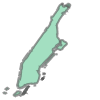

In [31]:
Manhattan_bounds

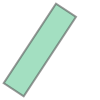

In [33]:
# Finding minimum_rotated_rectangle
Manhattan_min_rect = Manhattan_bounds.minimum_rotated_rectangle
Manhattan_min_rect

In [34]:
bbox = list(Manhattan_min_rect.exterior.coords)
bbox

[(-74.00204292488772, 40.659713860414584),
 (-73.8734840840882, 40.855077614655514),
 (-73.92264456977622, 40.88742760238865),
 (-74.05120341057574, 40.69206384814772),
 (-74.00204292488772, 40.659713860414584)]

In [35]:
def _azimuth(point1, point2):
    """azimuth between 2 points (interval 0 - 180)"""
    import numpy as np

    angle = np.arctan2(point2[0] - point1[0], point2[1] - point1[1])
    return np.degrees(angle) if angle > 0 else np.degrees(angle) + 180

def _dist(a, b):
    """distance between points"""
    import math

    return math.hypot(b[0] - a[0], b[1] - a[1])

def azimuth(mrr):
    """azimuth of minimum_rotated_rectangle"""
    bbox = list(mrr.exterior.coords)
    axis1 = _dist(bbox[0], bbox[3])
    axis2 = _dist(bbox[0], bbox[1])

    if axis1 <= axis2:
        az = _azimuth(bbox[0], bbox[1])
    else:
        az = _azimuth(bbox[0], bbox[3])

    return az

In [36]:
rot_ang = azimuth(Manhattan_min_rect)
rot_origin = list(Manhattan_min_rect.exterior.coords)[0]

In [37]:
rotated_min_rect = gpd.GeoSeries(Manhattan_min_rect).rotate(rot_ang, origin=rot_origin)

In [38]:
def make_grid(rect_edge_points, rows, cols):
  import geopandas as gpd
  from shapely.geometry import Polygon, Point
  import numpy as np
  xmin,ymin,xmax,ymax =  rect_edge_points.bounds

  height = (ymax-ymin)/rows
  width = (xmax-xmin)/cols

  XleftOrigin = xmin
  XrightOrigin = xmin + width
  YtopOrigin = ymax
  YbottomOrigin = ymax- height
  polygons = []
  pos = []
  for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        pos.append((j, i))
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width
  return gpd.GeoDataFrame({'geometry':polygons, 'position':pos})

In [39]:
rows = 15
cols = 5
grid = make_grid(rotated_min_rect[0], rows=rows, cols=cols)

In [40]:
import copy
rotated_grid = copy.copy(grid)
rotated_grid.geometry = grid.geometry.rotate(-rot_ang, origin=rot_origin)

In [43]:
grid_matrix = {}
for i in grid.index:
  grid_matrix[grid.position[i]] = grid.geometry[i]

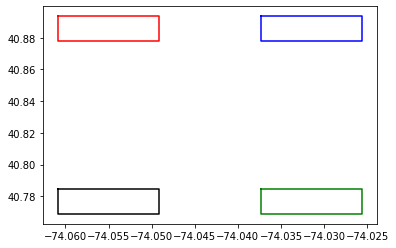

In [44]:
plt.figure()
x,y = grid_matrix[(0,0)].exterior.xy
plt.plot(x, y, 'r')
x,y = grid_matrix[(0,2)].exterior.xy
plt.plot(x, y, 'b')
x,y = grid_matrix[(7,0)].exterior.xy
plt.plot(x, y, 'k')
x,y = grid_matrix[(7,2)].exterior.xy
plt.plot(x, y, 'g')

In [45]:
manhattan = borough_bound.drop(['Bronx', 'Staten Island', 'Brooklyn', 'Queens'], axis=0)

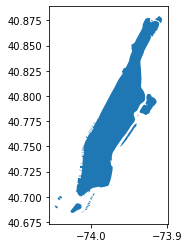

In [46]:
manhattan.plot()

In [47]:
# subregions = gpd.read_file('nyu-subregions.json')
# subregions = gpd.GeoDataFrame(gpd.GeoSeries(make_grid(Manhattan_min_rect, 0.005)),columns=['geometry'])
subregions = gpd.GeoDataFrame(rotated_grid,columns=['geometry', 'position'])
subregions.head()

,geometry,position
0,"POLYGON ((-73.92264 40.88743, -73.91281 40.880...","(0, 0)"
1,"POLYGON ((-73.93122 40.87440, -73.92138 40.867...","(1, 0)"
2,"POLYGON ((-73.93979 40.86138, -73.92995 40.854...","(2, 0)"
3,"POLYGON ((-73.94836 40.84835, -73.93852 40.841...","(3, 0)"
4,"POLYGON ((-73.95693 40.83533, -73.94709 40.828...","(4, 0)"


In [48]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
start_date_string = '2015-01-01 00:00:00'
end_date_string = '2015-03-31 23:59:00'
start_date = pd.Timestamp(start_date_string)
end_date = pd.Timestamp(end_date_string)
time_steps = pd.date_range(start=start_date, end=end_date, freq='H')

df.set_index('CRASH DATE_CRASH TIME', inplace=True)
df_2015_filtered = df.loc[start_date_string:end_date_string][['LOCATION', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']]
df_2015_filtered.sort_index(inplace=True)
df_2015_filtered.reset_index(inplace=True)
df.reset_index(inplace=True)
df_2015_filtered.head()

,CRASH DATE_CRASH TIME,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
0,2015-01-01 00:20:00,"(40.7518471, -73.787862)",0.0,0.0
1,2015-01-01 00:21:00,"(40.6894449, -73.9551212)",0.0,0.0
2,2015-01-01 00:30:00,"(40.6738445, -73.9250801)",0.0,0.0
3,2015-01-01 00:51:00,"(40.6566844, -73.9298964)",2.0,0.0
4,2015-01-01 01:00:00,"(40.6646598, -73.905579)",0.0,0.0


In [ ]:
X = []
Y = []
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon

for i in tqdm(range(len(df_2015_filtered))):
  lat = df_2015_filtered.LOCATION[i][0]
  lon = df_2015_filtered.LOCATION[i][1]
  p = Point(lon, lat)
  if Manhattan_bounds.contains(p):
    X.append(lon)
    Y.append(lat)
    if not subregions[subregions.geometry.contains(p)].empty:
      ind = subregions[subregions.geometry.contains(p)].index.values[0]
      subregions.loc[ind:ind]['Risk'] += 1 + \
      2 * df_2015_filtered['NUMBER OF PERSONS INJURED'].loc[i] +\
      3 * df_2015_filtered['NUMBER OF PERSONS KILLED'].loc[i]                                                                 

In [85]:
fig, ax = plt.subplots(figsize=(8,8))
subregions.plot(column='Risk', facecolor='white', ax=ax, cmap='hot', edgecolors='black', alpha=1)
mplleaflet.display(fig=ax.figure, tiles='cartodb_positron')

### Risk Matrix Calculation

In [86]:
def risk_matrix_plot(ax, subregions, risk_matrix, boundary):
  import copy
  subregions_temp = copy.copy(subregions)
  subregions_temp['risk'] = subregions_temp['position'].apply(lambda x: risk_matrix[x[0],x[1]])
  subregions_temp.plot(column='risk', facecolor='white', ax=ax, cmap='Reds', edgecolors='black', alpha=1) 
  manhattan.plot(facecolor="none", edgecolor="green", ax=ax)

def generate_risk_matrix(rows, cols, data, bounds, subregs):
  risk_matrix = np.zeros((rows, cols))
  for i in range(len(data)):
    lat = data.LOCATION[i][0]
    lon = data.LOCATION[i][1]
    p = Point(lon, lat)
    if bounds.contains(p):
      if not subregs[subregs.geometry.contains(p)].empty:
        ind = subregs[subregs.geometry.contains(p)].index.values[0]
        row, col = subregs.loc[ind]['position']
        risk_matrix[row, col] += 1 + \
        2 * data['NUMBER OF PERSONS INJURED'].loc[i] +\
        4 * data['NUMBER OF PERSONS KILLED'].loc[i]
  return risk_matrix
   


In [87]:
mask_matrix = np.zeros((rows, cols))
mask_series = subregions['geometry'].apply(lambda x: 1 if Manhattan_bounds.intersection(x).area/x.area > 0.15 else 0)
for i in range(len(mask_series)):
  mask_matrix[subregions.position[i]] = mask_series[i]


In [88]:
from tqdm import tqdm
from shapely.geometry import Polygon, Point
ind_crash = 0
risk_matrix_time_series = []

df_filtered = df_2015_filtered
crash_times_list = df_filtered['CRASH DATE_CRASH TIME'].to_list()
for time_step in tqdm(time_steps[1:]):
  data_per_timeslot = pd.DataFrame({
                                  "CRASH DATE_CRASH TIME": [],
                                  "LOCATION": [],
                                  "NUMBER OF PERSONS INJURED": [],
                                  "NUMBER OF PERSONS KILLED": []
                                    })
  while ind_crash < len(df_filtered) and time_step > crash_times_list[ind_crash]:
    data_per_timeslot = pd.concat([data_per_timeslot, df_filtered.loc[ind_crash:ind_crash]], axis=0)
    ind_crash += 1
  data_per_timeslot.reset_index(inplace=True)
  risk_matrix = generate_risk_matrix(rows, cols, data_per_timeslot, Manhattan_bounds, subregions)  
  risk_matrix_time_series.append(risk_matrix)
risk_matrix_time_series = np.array(risk_matrix_time_series)


100%|██████████| 2159/2159 [01:45<00:00, 20.43it/s]


Using priori knowledge to avoid zero inflated problem

In [89]:
week_len = 24*7
risk_matrix_time_series_new = []
ave_weekly_risk_matrix = []
for i, risk_matrix in enumerate(risk_matrix_time_series):
  if i%(week_len) == 0:
    week_matrices = risk_matrix_time_series[i:i+week_len]
    m = np.sum(week_matrices, axis=0)/np.sum(week_matrices*mask_matrix)
    ave_weekly_risk_matrix = np.log(m, out=np.zeros_like(m), where=(m!=0)) / 2

  risk_matrix_time_series_new.append(risk_matrix + (risk_matrix==0)
  *ave_weekly_risk_matrix*mask_matrix - np.min(ave_weekly_risk_matrix)*mask_matrix )
  
risk_matrix_time_series_new = np.array(risk_matrix_time_series_new)

In [90]:
risk_matrix_time_series_new.shape

(2159, 15, 5)

In [91]:
risk_matrix_time_series_new[3]

array([[3.30400031, 1.03972077, 0.        , 0.        , 0.        ],
       [0.69314718, 1.24245332, 0.        , 0.        , 0.        ],
       [1.38629436, 4.30400031, 0.        , 0.        , 0.        ],
       [1.24245332, 1.03972077, 0.        , 0.        , 0.        ],
       [1.24245332, 1.3540251 , 1.09861229, 0.34657359, 3.30400031],
       [0.80471896, 1.31952866, 1.47221949, 0.89587973, 3.30400031],
       [1.24245332, 1.3540251 , 5.30400031, 1.49786614, 0.        ],
       [1.38629436, 1.31952866, 1.81879308, 1.09861229, 0.        ],
       [1.49786614, 1.58902692, 4.30400031, 1.44518588, 0.        ],
       [1.66610226, 2.05543693, 1.88060006, 0.54930614, 0.        ],
       [1.38629436, 1.52226122, 1.68364791, 1.52226122, 0.        ],
       [0.        , 1.60943791, 4.30400031, 1.49786614, 0.        ],
       [0.        , 1.03972077, 1.15129255, 0.        , 0.        ],
       [0.        , 0.        , 0.34657359, 0.        , 0.        ],
       [0.        , 0.        , 3.

In [92]:
risk_matrix_time_series[3]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

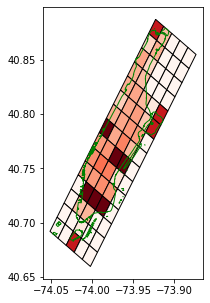

In [95]:
fig, ax = plt.subplots(figsize=(8,5))
risk_matrix_plot(ax, subregions, risk_matrix_time_series_new[108], manhattan)

In [ ]:
risk_matrix_time_series_new[108] 

array([[0.3700859 , 0.837536  , 0.        , 0.        , 0.        ],
       [0.94758485, 0.98467773, 0.        , 0.        , 0.        ],
       [1.04531893, 0.94530477, 0.        , 0.        , 0.        ],
       [0.9721411 , 0.96199498, 0.        , 0.        , 0.        ],
       [0.95614673, 1.10565357, 1.12238286, 0.81874991, 1.87100932],
       [0.94488179, 1.10430705, 1.19921587, 0.95661442, 1.87100932],
       [1.02053721, 0.99565508, 1.10003494, 1.10024209, 0.        ],
       [2.87100932, 0.98306672, 1.17782284, 1.10713134, 0.        ],
       [1.07157897, 1.21929144, 2.87100932, 2.87100932, 0.        ],
       [1.22441793, 1.35763644, 1.35049803, 0.97432449, 0.        ],
       [1.12613283, 1.21426466, 1.26309371, 1.09617885, 0.        ],
       [0.        , 2.87100932, 2.87100932, 2.87100932, 0.30935264],
       [0.        , 1.03915171, 1.09172325, 0.        , 0.        ],
       [0.        , 0.        , 0.66731211, 0.        , 0.        ],
       [0.        , 0.        , 1.

In [ ]:
risk_matrix_time_series[108] 

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Displaying crash map for 16 time slots.


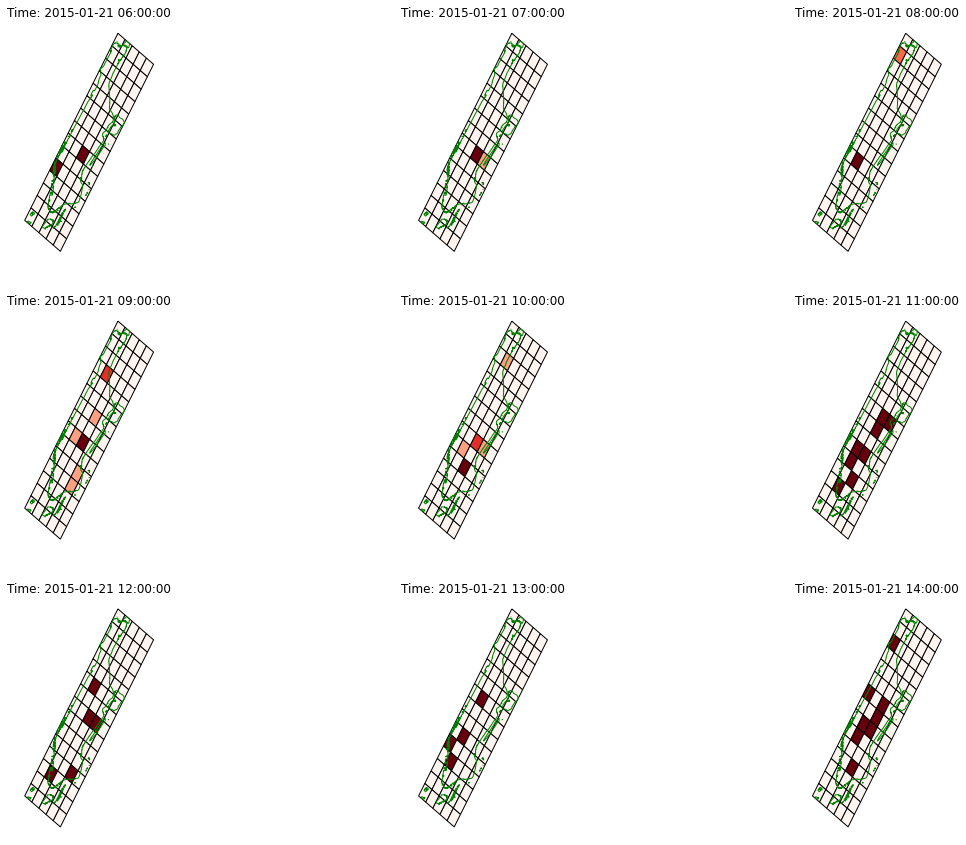

In [104]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Construct a figure for visualizing the images.
offset = 24*20 + 5
for idx, ax in enumerate(axes.flat):
    risk_matrix_plot(ax, subregions, risk_matrix_time_series[idx+offset], manhattan)
    ax.set_title(f"Time: {time_steps[idx+offset + 1]}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying crash map for {16} time slots.")
plt.show()

# Training using Conv-LSTM

In [108]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Sequential

In [109]:
dataset = []
PREV_TIMESTEP_LEN = 6
PREV_WEEKS_LEN = 2
HIST_LEN = PREV_TIMESTEP_LEN + PREV_WEEKS_LEN
FREQ_PER_DAY = int(24/1) #24 hours
FREQ_PER_WEEK = 7*FREQ_PER_DAY
FUTURE_STEP = 1


In [110]:
def generate_dataset_ConvLSTM(timeseries_matrix):
  X = []
  y = []
  len_matrix = len(timeseries_matrix)
  for i in range(PREV_WEEKS_LEN*FREQ_PER_WEEK, len_matrix, 1):

    # Filtering the last 'PREV_TIMESTEP_LEN time steps
    sample = timeseries_matrix[i-PREV_TIMESTEP_LEN : i]

    # Filtering the last 'PREV_WEEKS_LEN' weeks
    sample = np.append(sample, timeseries_matrix[i-\
            (np.arange(PREV_WEEKS_LEN)+1) * FREQ_PER_WEEK], axis=0)
    X.append(sample)
    y. append(timeseries_matrix[i])
  return np.array(X), np.array(y)

Merging Datasets

In [111]:
trip_matrix_time_series_total = np.load("trip_matrix_time_series_total.npy")

In [112]:
risk_matrix_time_series_new.shape

(2159, 15, 5)

In [113]:
a = np.expand_dims(risk_matrix_time_series_new, axis=-1)
b = np.expand_dims(trip_matrix_time_series_total, axis=-1)
data_series = np.append(a, b, axis=-1)
data_series.shape

(2159, 15, 5, 2)

In [114]:
X, Y =  generate_dataset_ConvLSTM(data_series)

In [115]:
Y = np.expand_dims(Y[:,:,:,0], axis=-1)

In [116]:
X.shape

(1823, 8, 15, 5, 2)

In [117]:
# Split into train and test sets using indexing to optimize memory.
indexes = np.arange(X.shape[0])
train_index = indexes[: int(0.8 * X.shape[0])]
np.random.shuffle(train_index)
test_index = indexes[int(0.8 * X.shape[0]) :]
X_train = X[train_index]
Y_train = Y[train_index]
time_train = time_steps[train_index+1]
X_test = X[test_index]
Y_test = Y[test_index]
time_test = time_steps[test_index+1]

In [ ]:
# # Normalize the data
# norm_layer = tf.keras.layers.Normalization(axis=-1)
# norm_layer.adapt(X_train)
# scaled_X_train = norm_layer(X_train)
# scaled_X_test = norm_layer(X_test)
# # from sklearn import preprocessing
# # scaled_X_train = preprocessing.scale(X_train)

In [ ]:
# Normalize the data
MAX_ch0 = np.max(risk_matrix_time_series_new)
MAX_ch1 = np.max(trip_matrix_time_series_total)

scaled_X_train = copy.copy(X_train)
scaled_X_train[:,:,:,:,0] = scaled_X_train[:,:,:,:,0]/MAX_ch0
scaled_X_train[:,:,:,:,1] = scaled_X_train[:,:,:,:,1]/MAX_ch1

scaled_X_test = copy.copy(X_test)
scaled_X_test[:,:,:,:,0] = scaled_X_test[:,:,:,:,0]/MAX_ch0
scaled_X_test[:,:,:,:,1] = scaled_X_test[:,:,:,:,1]/MAX_ch1

scaled_Y_train = Y_train/MAX_ch0
scaled_Y_test = Y_test/MAX_ch0

In [ ]:
# Construct the input layers

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
model = Sequential([
                    layers.ConvLSTM2D(filters=32,kernel_size=(5, 5),
                    padding="same", return_sequences=True, activation="relu",
                    input_shape = (None, *X_train.shape[2:])),
                    layers.BatchNormalization(),
                    layers.ConvLSTM2D(filters=32,kernel_size=(3, 3),
                    padding="same", return_sequences=True, activation="relu"),
                    layers.BatchNormalization(),
                    layers.ConvLSTM2D(filters=32,kernel_size=(1, 1),
                    padding="same", return_sequences=False, activation="relu"),
                    layers.BatchNormalization(),
                    layers.Conv2D(filters=1, kernel_size=(3, 3)
                    , activation="sigmoid", padding="same")])
model.compile(loss='binary_crossentropy', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_3 (ConvLSTM2D)  (None, None, 15, 5, 32)   108928    
                                                                 
 batch_normalization_3 (Batc  (None, None, 15, 5, 32)  128       
 hNormalization)                                                 
                                                                 
 conv_lstm2d_4 (ConvLSTM2D)  (None, None, 15, 5, 32)   73856     
                                                                 
 batch_normalization_4 (Batc  (None, None, 15, 5, 32)  128       
 hNormalization)                                                 
                                                                 
 conv_lstm2d_5 (ConvLSTM2D)  (None, 15, 5, 32)         8320      
                                                                 
 batch_normalization_5 (Batc  (None, 15, 5, 32)       

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 10
batch_size = 10

# Fit the model to the training data.
model.fit(
    scaled_X_train,
    scaled_Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(scaled_X_test, scaled_Y_test),
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/10
146/146 [==============================] - 67s 458ms/step - loss: 0.1401 - val_loss: 0.1438 - lr: 0.0010
Epoch 2/10
146/146 [==============================] - 68s 467ms/step - loss: 0.1401 - val_loss: 0.1437 - lr: 0.0010
Epoch 3/10
146/146 [==============================] - 70s 478ms/step - loss: 0.1399 - val_loss: 0.1434 - lr: 0.0010
Epoch 4/10
146/146 [==============================] - 70s 477ms/step - loss: 0.1399 - val_loss: 0.1431 - lr: 0.0010
Epoch 5/10
146/146 [==============================] - 68s 469ms/step - loss: 0.1399 - val_loss: 0.1429 - lr: 0.0010
Epoch 6/10
146/146 [==============================] - 68s 467ms/step - loss: 0.1399 - val_loss: 0.1430 - lr: 0.0010
Epoch 7/10
146/146 [==============================] - 68s 468ms/step - loss: 0.1398 - val_loss: 0.1425 - lr: 0.0010
Epoch 8/10
146/146 [==============================] - 67s 462ms/step - loss: 0.1398 - val_loss: 0.1427 - lr: 0.0010
Epoch 9/10
146/146 [==============================] - 68s 466ms/step - l

### Accident Risk Prediction

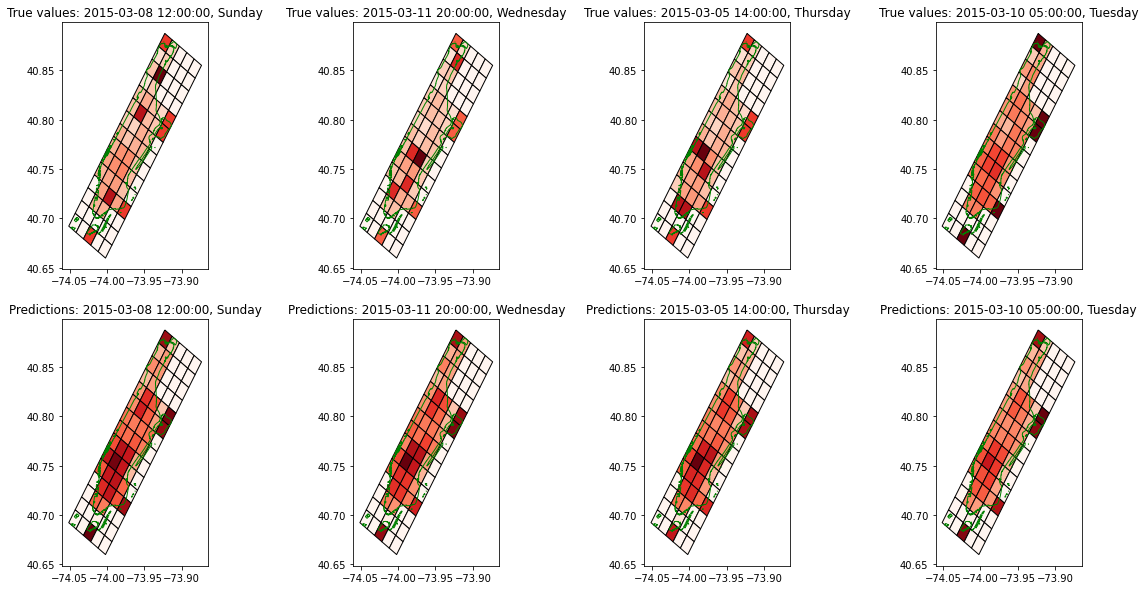

In [ ]:
# Select random examples from the test dataset.
day_dict = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
example_size = 4
rand_indices = np.random.choice(range(len(X_test)), size=example_size)
examples = scaled_X_test[rand_indices]
new_predictions = model.predict(examples)

# Construct a figure for the original and new crash risk maps.
fig, axes = plt.subplots(2, example_size, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    risk_matrix_plot(ax, subregions, np.squeeze(Y_test[rand_indices[idx]]), manhattan) 
    ax.set_title(f"True values: {time_test[rand_indices[idx]]}, {day_dict[time_test[rand_indices[idx]].dayofweek]}")


# Plot the original frames.
for idx, ax in enumerate(axes[1]):
    risk_matrix_plot(ax, subregions, 
                     np.squeeze(new_predictions[idx])*MAX_ch0, manhattan)
    ax.set_title(f"Predictions: {time_test[rand_indices[idx]]}, {day_dict[time_test[rand_indices[idx]].dayofweek]}")


## Taxi Trips

In [ ]:
import requests

In [ ]:
def textlist_to_df(textlist):
  row = []
  for line in textlist:
    row.append(line.replace('"', '').split(','))
  return pd.DataFrame(row[1:-1], columns=row[0])

In [ ]:
def get_trips_per_slot(slot_start_time, slot_end_time):
  print("get data")
  start = str(slot_start_time).replace(' ', 'T')
  end = str(slot_end_time).replace(' ', 'T')

  client = Socrata("data.cityofnewyork.us",
                 "WXsaoOdZqh0XR9wuTIniIuggd",
                 username="",
                 password="")

  green = client.get("gi8d-wdg5", where=f"lpep_pickup_datetime BETWEEN '{start}' AND '{end}'", limit=1000000, select="lpep_pickup_datetime, pickup_longitude, pickup_latitude")
  taxi_data_green = pd.DataFrame.from_records(green)
  taxi_data_green.columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude']
  print("finish")
  return taxi_data_green


In [ ]:
!pip install sodapy
import pandas as pd
from sodapy import Socrata

In [ ]:
subregions['trips'] = np.zeros(len(subregions))
subregions.sample()

,geometry,position,trips
43,"POLYGON ((-74.01440 40.70517, -74.00457 40.698...","(13, 2)",0.0


### Trip Matrix Calculation

In [ ]:
def trip_matrix_plot(ax, subregions, trip_matrix, bounds):
  import copy
  subregions_temp = copy.copy(subregions)
  mask = subregions_temp['geometry'].apply(lambda x: 1 if bounds.intersects(x) else 0)
  subregions_temp['trips'] = subregions_temp['position'].apply(lambda x: trip_matrix[x[0],x[1]]) * mask
  subregions_temp.plot(column='trips', facecolor='white', ax=ax, cmap='hot', edgecolors='black', alpha=1) 
  manhattan.plot(facecolor="none", edgecolor="green", ax=ax)
  return mask

def partial_trip_matrix(data, subregs, bounds):
  partial_trip_matrix = np.zeros((rows, cols))
  lon_min, lat_min, lon_max, lat_max = bounds.minx[0], bounds.miny[0],bounds.maxx[0], bounds.maxy[0]
  for i in range(len(data)):
    lat = float(data.pickup_latitude[i])
    lon = float(data.pickup_longitude[i])
    if float(lat_min)<lat<float(lat_max) and float(lon_min)<=lon<=float(lon_max):
      p = Point(lon, lat)
      # if bounds.contains(p):
      temp = subregs[subregs.geometry.contains(p)]
      if not temp.empty:
        ind = temp.index.values[0]
        row, col = subregs.loc[ind]['position']
        partial_trip_matrix[row, col] += 1
  return partial_trip_matrix


def generate_trip_matrix(rows, cols, data, bounds, subregs):
  
  trip_matrix = np.zeros((rows, cols))
  with concurrent.futures.ProcessPoolExecutor() as executor:
    data1 = data.loc[:int(len(data)/3)].reset_index()
    data2 = data.loc[int(len(data)/3):2*int(len(data)/3)].reset_index()
    data3 = data.loc[2*int(len(data)/3):].reset_index()
    f1 = executor.submit(partial_trip_matrix, data1, subregs, bounds)
    f2 = executor.submit(partial_trip_matrix, data2, subregs, bounds)
    f3 = executor.submit(partial_trip_matrix, data3, subregs, bounds)
    results = [f1, f2, f3]

    for f in concurrent.futures.as_completed(results):
      trip_matrix += f.result()
    return trip_matrix

In [ ]:
start_date_time_string = '2015-01-01 00:00:00'
end_date_time_string = '2015-03-31 23:59:00'
start_date_time = pd.Timestamp(start_date_time_string)
end_date_time = pd.Timestamp(end_date_time_string)
time_steps = pd.date_range(start=start_date_time, end=end_date_time, freq='1H')

In [ ]:
len(time_steps)

2160

In [ ]:
from tqdm import tqdm
import concurrent.futures
from timeit import default_timer as timer
from shapely.geometry import Polygon, Point
ind_trip = 0
trip_matrix_time_series = []
slot_start_time = start_date_time
slot_end_time = start_date_time + time_steps.freq
start = timer()

for slot_end_time in tqdm(time_steps[1:]):
  slot_start_time = slot_end_time - time_steps.freq
  print(slot_start_time)
  data_per_timeslot = get_trips_per_slot(slot_start_time, slot_end_time)
  # trip_times_list = df_filtered['pickup_datetime'].to_list()
  # for time_step in tqdm(time_steps[1:]):
  #   data_per_timeslot = pd.DataFrame({
  #                                   "pickup_datetime": [],
  #                                   "pickup_longitude": [],
  #                                   "pickup_latitude": []
  #                                     })
  #   while ind_trip < len(df_filtered) and time_step > trip_times_list[ind_trip]:
  #     data_per_timeslot = pd.concat([data_per_timeslot, df_filtered.loc[ind_trip:ind_trip]], axis=0)
  #     ind_trip += 1
  #   data_per_timeslot.reset_index(inplace=True)
  #   # print(data_per_timeslot.to_csv())
  print("length of data_per_timeslot=", len(data_per_timeslot))
  trip_matrix = generate_trip_matrix(rows, cols, data_per_timeslot, manhattan.bounds, subregions)  
  trip_matrix_time_series.append(trip_matrix)

end = timer()
print(end - start)
trip_matrix_time_series = np.array(trip_matrix_time_series)
np.save("trip_matrix_time_series2.npy", trip_matrix_time_series)



In [ ]:
trip_matrix_time_series = np.load("trip_matrix_time_series.npy")
np.shape(trip_matrix_time_series)

(2159, 15, 5)

In [ ]:
yellow = np.load("trip_matrix_time_series.npy")
green = np.load("trip_matrix_time_series2.npy")
trip_matrix_time_series_total = yellow + green
np.save("trip_matrix_time_series_total.npy", trip_matrix_time_series_total)

In [ ]:
np.shape(trip_matrix_time_series_total)

(2159, 15, 5)

In [ ]:
matrix = []
start = timer()
start_date_time_string = '2015-01-01 00:00:00'
# end_date_time_string = '2015-12-31 23:59:59'
end_date_time_string = '2015-03-31 23:59:00'
start_date_time = pd.Timestamp(start_date_time_string)
end_date_time = pd.Timestamp(end_date_time_string)
time_steps = pd.date_range(start=start_date_time, end=end_date_time, freq='H')


slot_start_time = start_date_time
slot_end_time = slot_start_time + time_steps.freq
data_per_timeslot = get_trips_per_slot(slot_start_time, slot_end_time)
# matrix.append(generate_trip_matrix(rows, cols, data_per_timeslot, manhattan.bounds, subregions))
end = timer()
print(end - start)

get data
finish
8.849453042999812


In [ ]:
data_per_timeslot

,pickup_datetime,pickup_longitude,pickup_latitude
0,2015-11-20T00:00:00.000,-73.991378784179688,40.750331878662109
1,2015-11-20T00:00:00.000,-73.994255065917969,40.751201629638672
2,2015-11-20T00:00:00.000,-73.954666137695313,40.780952453613281
3,2015-11-20T00:00:00.000,-73.978317260742188,40.759998321533203
4,2015-11-20T00:00:00.000,-73.985733032226563,40.723117828369141
...,...,...,...
15295,2015-11-20T00:59:59.000,-74.005409240722656,40.728641510009766
15296,2015-11-20T00:59:59.000,-73.990707397460938,40.728721618652344
15297,2015-11-20T01:00:00.000,-73.985671997070313,40.726993560791016
15298,2015-11-20T01:00:00.000,-73.986763000488281,40.736564636230469


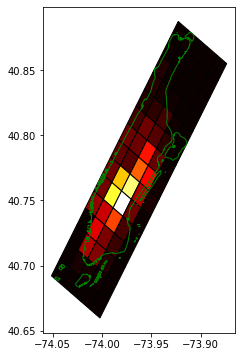

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
test = trip_matrix_plot(ax, subregions, trip_matrix_time_series_total[200], Manhattan_bounds)

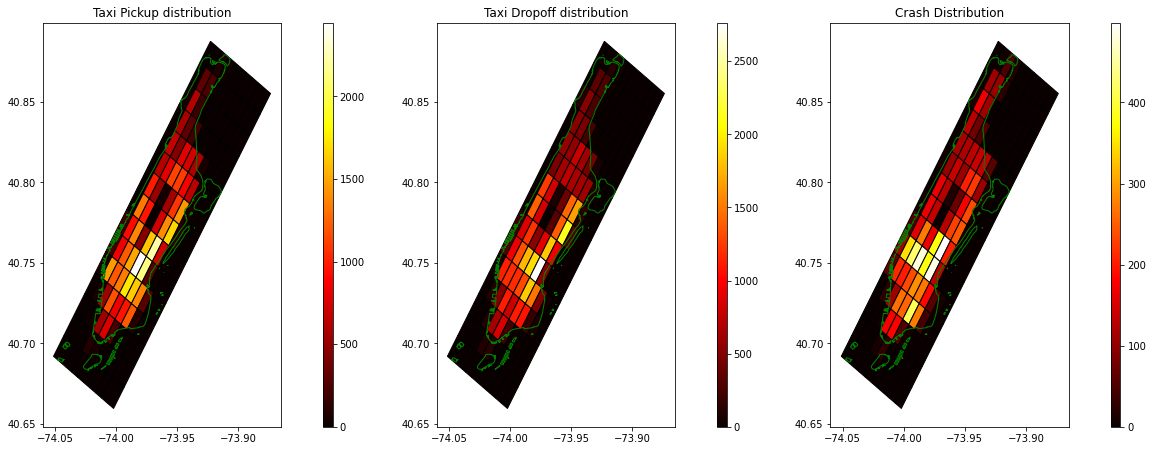

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))
subregions.plot(column='pickup', facecolor='white', ax=axs[0], cmap='hot', edgecolors='black', alpha=1) 
manhattan.plot(facecolor="none", edgecolor="green", ax=axs[0])
axs[0].set_title('Taxi Pickup distribution')
# set an axis for the color bar
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
vmax = subregions.pickup.max()
mappable = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)


subregions.plot(column='dropoff', facecolor='white', ax=axs[1], cmap='hot', edgecolors='black', alpha=1) 
manhattan.plot(facecolor="none", edgecolor="green", ax=axs[1])
axs[1].set_title('Taxi Dropoff distribution')
# set an axis for the color bar
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
vmax = subregions.dropoff.max()
mappable = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)


subregions.plot(column='Risk', facecolor='white', ax=axs[2], cmap='hot', edgecolors='black', alpha=1) 
manhattan.plot(facecolor="none", edgecolor="green", ax=axs[2])
axs[2].set_title('Crash Distribution')
# set an axis for the color bar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
vmax = subregions.Risk.max()
mappable = plt.cm.ScalarMappable(cmap='hot', norm=plt.Normalize(vmin=0, vmax=vmax))
cbar = fig.colorbar(mappable, cax=cax)

